In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , recall_score ,accuracy_score,precision_score
RANDOM_SEED =2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [6]:
dataset = pd.read_csv("creditcard.csv")

In [7]:
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
print("Any nulls in the dataset " , dataset.isnull().values.any())
print("--------")
print("No. of unique labels " ,len(dataset['Class'].unique()))
print("Label values " , dataset.Class.unique())
print('--------')
print("Break down of the Normal and Fraud Transaction")
print(pd.value_counts(dataset['Class'] , sort = True))

Any nulls in the dataset  False
--------
No. of unique labels  2
Label values  [0 1]
--------
Break down of the Normal and Fraud Transaction
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_31444\2629081359.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'] , sort = True))


C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_31444\2006362297.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort = True)


Text(0, 0.5, 'Number of observations')

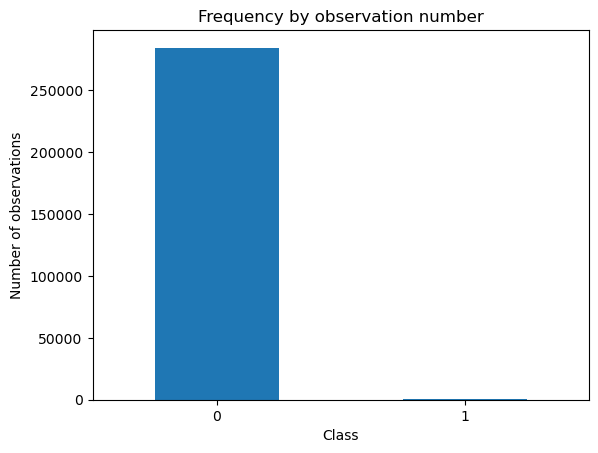

In [16]:
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar' , rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of observations")


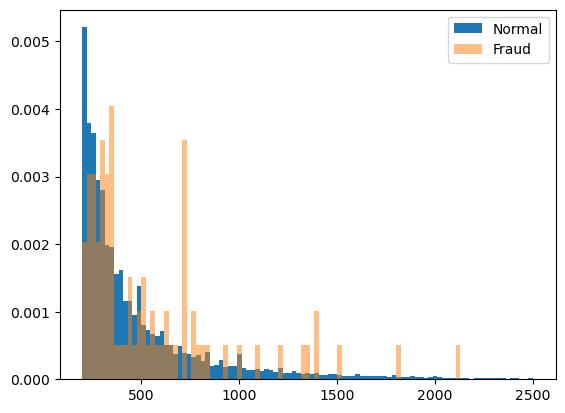

In [19]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]
bins = np.linspace(200 , 2500 , 100)
plt.hist(normal_dataset.Amount , bins= bins , alpha = 1, density = True , label = 'Normal')
plt.hist(fraud_dataset.Amount , bins = bins , alpha = 0.5 , density = True , label = 'Fraud')
plt.legend(loc='upper right')

In [22]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1 , 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [29]:
raw_data = dataset.values
labels = raw_data[: , -1]
data = raw_data[:, 0:-1]
train_data , test_data , train_labels , test_labels = train_test_split( data , labels , test_size = 0.2 ,random_state = 2021)

In [30]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val)/(max_val - min_val)
test_data = (test_data - min_val)/(max_val - min_val)
train_data = tf.cast(train_data , tf.float32)
test_data = tf.cast(test_data , tf.float32)

In [31]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [34]:
normal_train_data =train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print("No. of records in Fraud Train Data ", len(fraud_train_data))
print("No. of records in Normal Train Data ", len(normal_train_data))
print("No. of records in Fraud Test Data ", len(fraud_test_data))
print("No. of records in Normal Test Data ", len(normal_test_data))

No. of records in Fraud Train Data  389
No. of records in Normal Train Data  227456
No. of records in Fraud Test Data  103
No. of records in Normal Test Data  56859


In [49]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim /2)
hidden_dim_2 = 4
learning_rate = 1e-7

In [59]:
from tensorflow.keras import regularizers
input_layer = tf.keras.layers.Input(shape = (input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim , activation="tanh", activity_regularizer=regularizers.l2(learning_rate)
)(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation="relu")(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

In [60]:
decoder = tf.keras.layers.Dense(hidden_dim_1 , activation = 'relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(input_dim , activation = 'tanh')(decoder)

In [61]:
autoencoder = tf.keras.Model(inputs = input_layer , outputs = decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 846 (3.30 KB)

 Trainable params: 846 (3.30 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath="autoencoder_fraud.h5",
    monitor='val_loss',
    mode='min',
    verbose=2,
    save_best_only=True
)

# Stop training early if validation loss stops improving
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,       # minimum change to qualify as improvement
    patience=10,            # number of epochs to wait before stopping
    verbose=1,
    mode='min',
    restore_best_weights=True
)

"""Compile the Autoencoder"""

autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [63]:
history = autoencoder.fit(normal_train_data , normal_train_data,
                          epochs = nb_epoch,
                          batch_size = batch_size,
                          shuffle = True,
                          validation_data =(test_data , test_data),
                          verbose = 1,
                          callbacks=[cp, early_stop]
                         ).history

Epoch 1/50
3540/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0326 - loss: 0.0306 
Epoch 1: val_loss improved from None to 0.00002, saving model to autoencoder_fraud.h5


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.0454 - loss: 0.0085 - val_accuracy: 0.1278 - val_loss: 2.0660e-05
Epoch 2/50
3548/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0545 - loss: 2.0817e-05 
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0665 - loss: 1.9625e-05 - val_accuracy: 0.2168 - val_loss: 1.9776e-05
Epoch 3/50
3552/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0676 - loss: 1.9325e-05 
Epoch 3: val_loss did not improve from 0.00002
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0684 - loss: 1.9168e-05 - val_accuracy: 0.2168 - val_loss: 1.9830e-05
Epoch 4/50
3547/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0679 - loss: 1.9122e-05 
Epoch 4: val_loss did not improve from 0.00002
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.0633 - loss: 1.9251e-05 - val_accuracy: 0.1279 - val_loss: 1.9883e-05
Epoch 5/50
3538/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0582 - loss: 1.9431e-05 
Epoch 5: val_loss did not improve from 0.00002
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.0608 - loss: 1.9273e-05 - val_accuracy: 0.0363 - val_loss: 1.9932e-05
Epoch 6/50
3550/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

In [66]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], linewidth=2, label='Train Loss')
plt.plot(history.history['val_loss'], linewidth=2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

AttributeError: 'dict' object has no attribute 'history'

<Figure size 800x500 with 0 Axes>

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


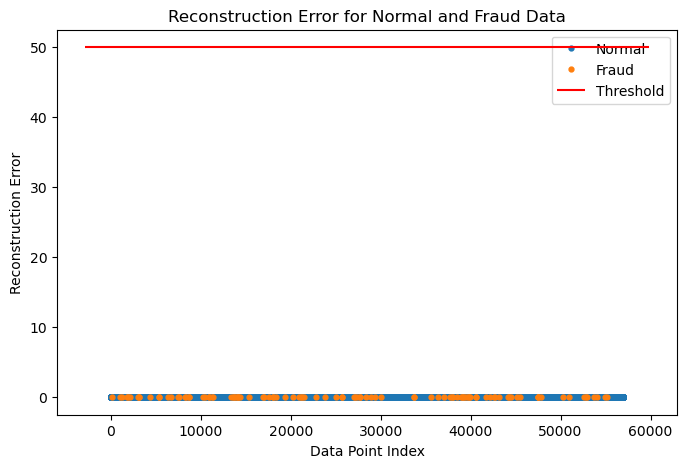

In [67]:
# Predict on test data
test_x_predictions = autoencoder.predict(test_data)

# Calculate reconstruction error (Mean Squared Error)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)

# Create a DataFrame with reconstruction errors and true labels
error_df = pd.DataFrame({
    'Reconstruction_error': mse,
    'True_class': test_labels
})
# Set a threshold to classify anomalies
threshold_fixed = 50

# Group errors by class (Normal vs Fraud)
groups = error_df.groupby('True_class')

fig, ax = plt.subplots(figsize=(8, 5))

# Plot reconstruction error for both classes
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label='Fraud' if name == 1 else 'Normal')

# Plot threshold line
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
           colors="r", zorder=100, label='Threshold')

ax.legend()
plt.title("Reconstruction Error for Normal and Fraud Data")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()


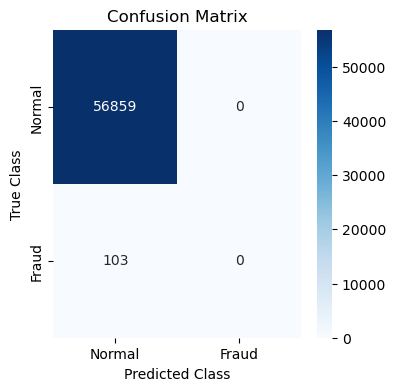

✅ Accuracy:   0.9981917769741231
🔁 Recall:     0.0
🎯 Precision:  0.0


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define threshold
threshold_fixed = 52

# Predict class based on reconstruction error
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

# Add predictions to the DataFrame
error_df['pred'] = pred_y

# Create confusion matrix
LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(error_df.True_class, error_df.pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Print evaluation metrics
print("✅ Accuracy:  ", accuracy_score(error_df['True_class'], error_df['pred']))
print("🔁 Recall:    ", recall_score(error_df['True_class'], error_df['pred']))
print("🎯 Precision: ", precision_score(error_df['True_class'], error_df['pred']))


In [69]:
history

{'accuracy': [0.045388996601104736,
  0.06648758798837662,
  0.06838685274124146,
  0.063251793384552,
  0.06075460836291313,
  0.05993686616420746,
  0.06089968979358673,
  0.05687253922224045,
  0.060574352741241455,
  0.06016108766198158,
  0.060794174671173096],
 'loss': [0.008473755791783333,
  1.9624641936388798e-05,
  1.91678245755611e-05,
  1.925097058119718e-05,
  1.9273038560640998e-05,
  1.9264778529759496e-05,
  1.9267763491370715e-05,
  1.9265917217126116e-05,
  1.9262057321611792e-05,
  1.9263008653069846e-05,
  1.926539152918849e-05],
 'val_accuracy': [0.12778694927692413,
  0.2168463170528412,
  0.2168463170528412,
  0.12785716354846954,
  0.03630490601062775,
  0.01090200524777174,
  0.0010006671072915196,
  0.06607913970947266,
  0.059636250138282776,
  0.06607913970947266,
  0.03430357202887535],
 'val_loss': [2.0659763322328217e-05,
  1.977585634449497e-05,
  1.9829907614621334e-05,
  1.988318399526179e-05,
  1.993227851926349e-05,
  1.9896531739505008e-05,
  1.9897